In [1]:
!pip install tensorflow

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [2]:

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K

In [3]:
resnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=1000)

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [7]:
age_model = Sequential()

age_model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(2,2,2048)))
age_model.add(BatchNormalization())
age_model.add(Flatten())
age_model.add(Dense(256, activation='relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(128, activation='relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(64, activation='relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(2, activation= "softmax"))
age_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2, 2, 128)         2359424   
                                                                 
 batch_normalization (BatchN  (None, 2, 2, 128)        512       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [8]:
path = "C:/Users/user/Desktop/Age and Gender/archive/UTKFace/"
path2 ="C:/Users/user/Desktop/Age and Gender/agegender_data/UTKFace1/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)


Total samples: 23708


In [9]:
images =[]
age =[]
gender =[]
for file in files:
    im = load_img(path+file)
    im = np.array(im)
    im= cv2.resize(im,(64,64))
    im = np.array(im, dtype="float") / 255.0
    split_var = file.split('_')
    images.append(im)
    age.append(int(split_var[0]))
    gender.append(int(split_var[1]))

In [10]:
temp = list(zip(images,age,gender))
random.shuffle(temp)
shuffled_images,huffled_age,shuffled_gender =zip(*temp)


In [11]:
set_1_images = np.array(images[:20000])
set_1_ages = np.array(age[:20000])
set_1_gender = np.array(gender[:20000])
# set_2_images = np.array(images[7000:15000])
# set_2_ages = np.array(age[7000:15000])
# set_2_gender = np.array(gender[7000:15000])

In [12]:
set_1_images.shape

(20000, 64, 64, 3)

In [13]:
gender_class = to_categorical(set_1_gender, dtype = "int",num_classes=2)

In [14]:

def my_train_test_split(X, Y, train_ratio=0.8):
    """return X_train, Y_train, X_test, Y_test"""
    n = X.shape[0]
    split = int(n * train_ratio)
    index = np.arange(n)
    np.random.shuffle(index)
    return X[index[:split]], Y[index[:split]], X[index[split:]], Y[index[split:]]

x_train ,y_train,x_test,y_test = my_train_test_split(set_1_images,gender_class)

In [15]:
x_train.shape

(16000, 64, 64, 3)

In [16]:
x_test.shape

(4000, 64, 64, 3)

In [17]:
x_train_predicted = resnet.predict(x_train)

500/500 [==============================] - 126s 250ms/step


In [18]:
x_test_predicted = resnet.predict(x_test)

125/125 [==============================] - 30s 238ms/step


In [25]:
age_model.compile(optimizer='Adam',loss= "categorical_crossentropy",metrics=['accuracy'])
age_h = age_model.fit(x_train_predicted,y_train,validation_data = (x_test_predicted,y_test),epochs=50)

Epoch 1/50
500/500 [==============================] - 28s 54ms/step - loss: 0.4689 - accuracy: 0.7867 - val_loss: 0.5675 - val_accuracy: 0.6923
Epoch 2/50
500/500 [==============================] - 30s 59ms/step - loss: 0.4644 - accuracy: 0.7846 - val_loss: 0.4625 - val_accuracy: 0.7707
Epoch 3/50
500/500 [==============================] - 31s 62ms/step - loss: 0.4650 - accuracy: 0.7864 - val_loss: 0.5716 - val_accuracy: 0.7245
Epoch 4/50
500/500 [==============================] - 31s 62ms/step - loss: 0.4601 - accuracy: 0.7872 - val_loss: 0.4667 - val_accuracy: 0.7710
Epoch 5/50
500/500 [==============================] - 31s 62ms/step - loss: 0.4532 - accuracy: 0.7921 - val_loss: 0.4521 - val_accuracy: 0.7805
Epoch 6/50
500/500 [==============================] - 31s 62ms/step - loss: 0.4541 - accuracy: 0.7928 - val_loss: 0.5027 - val_accuracy: 0.7520
Epoch 7/50
500/500 [==============================] - 31s 62ms/step - loss: 0.4557 - accuracy: 0.7886 - val_loss: 0.4501 - val_accuracy:

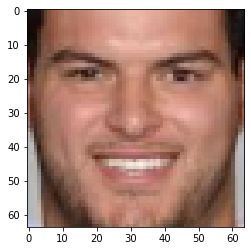

In [32]:
plt.imshow(x_test[10])

In [37]:
y_test[10]

array([0, 1])

In [38]:
ans = age_model.predict(resnet.predict(x_test[10].reshape(1,64,64,3)))

1/1 [==============================] - 0s 17ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
                    

In [ ]:
m1 = load_model("high_resol1.model")
m2 = load_model("high_resol2.model")